<h1 align="center">Student Performance Prediction Model</h1>

Dataset: <a href="https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression">Click here for dataset</a>

In [1]:
#Importing some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data

df = pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## About the Project
On this dataset, I'll try to use Linear regression Model to predict the performance of students generated based on following criteria:
* **Hours Studied:** The total number of hours spent studying by each student.
* **Previous Scores:** The scores obtained by students in previous tests.
* **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
* **Sleep Hours:** The average number of hours of sleep the student had per day.
* **Sample Question Papers Practiced:** The number of sample question papers the student practiced.
* **Performance Index (Output Variable):** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

I'll start by dealing with any null values and remove the duplicated rows, if any. After that, I'll check the assumptions of Linear Regression model, and will continue with this model if all of the assumptions are satisfied.

### Assumptions of Linear Regression Model:
* Explanatory variables are linearly related to dependent variable
* No perfect multicollinearity
* Homoscedasticity
* No autocorrelation
* Error term are white noise and error term ~ N(0,sigma^2)

In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#Checking for duplicated rows

df.duplicated().sum()

127

In [8]:
#Duplicated rows

duplicate_data = df[df.duplicated()]
duplicate_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [9]:
#Removing duplicated rows

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.shape

(9873, 6)

In [11]:
#Checking the null values

df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### 1. LINEARITY

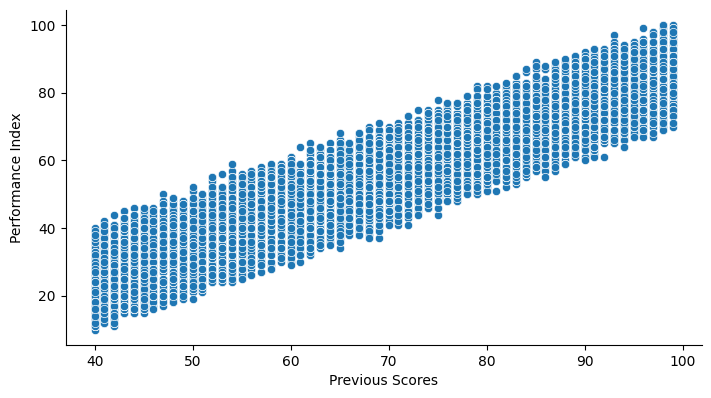

In [103]:
sns.pairplot(df, x_vars='Previous Scores', y_vars='Performance Index', size=4, aspect=1.8)

The first assumption is satisfied as we can observe from the above graphs that the continuous independent variable is linearly related to dependent variable.

### 2. Multicollinearity

In [28]:
df1 = pd.get_dummies(df,drop_first=True,dtype=int)
df1.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [33]:
df2 = df1.drop('Performance Index', axis=1)

In [34]:
# For checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Checking Multicollinearity
vif_info = pd.DataFrame()   ## Creating an empty data frame
vif_info['Column'] = df2.columns  ## A new column with all the independent variables
vif_info['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]   ## Creating a new column with VIF values
vif_info.sort_values('VIF', ascending=False)   ## Sorting the data in descending order

,Column,VIF
1,Previous Scores,10.119579
2,Sleep Hours,9.843302
0,Hours Studied,4.265115
3,Sample Question Papers Practiced,3.350801
4,Extracurricular Activities_Yes,1.929446


The threshold for VIF is 10 (5 in some cases). Here, almost all the variables have VIF less than equal to 10 except for 'Previous Score'. But we can ignore that as it is not much greater than 10. Hence, the assumption of Multicollinearity is also satisfied.

## MODEL BUILDING

In [36]:
#Splitting the data
from sklearn.model_selection import train_test_split

X = df1.drop('Performance Index', axis=1)
y = df1['Performance Index']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Linear regression using cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
# Cross val score

scores = cross_val_score(regression,X_train,y_train,cv=5)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.98936602 0.98843614 0.98851921 0.98914535 0.98885592]


In [43]:
# Mean cross val score

print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.99


In [45]:
# Predicted values on test data

y_pred = regression.predict(X_test)

In [46]:
# Calculating the coefficients

print(regression.coef_)

[ 7.37313051 17.65623871  0.80147322  0.55465062  0.27839863]


In [47]:
# Calculating the intercepts

print(regression.intercept_)

55.08247721024454


In [48]:
# Calculating the R squared value

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9881593003934889

In [49]:
# Training y_pred

y_pred_train = regression.predict(X_train)

In [50]:
# Finding residuals

residuals = y_pred_train - y_train

### 3. HOMOSCEDASTICITY

Text(0.5, 1.0, 'Residuals v/s Fitted Values Plot for Homoscedasticity Check')

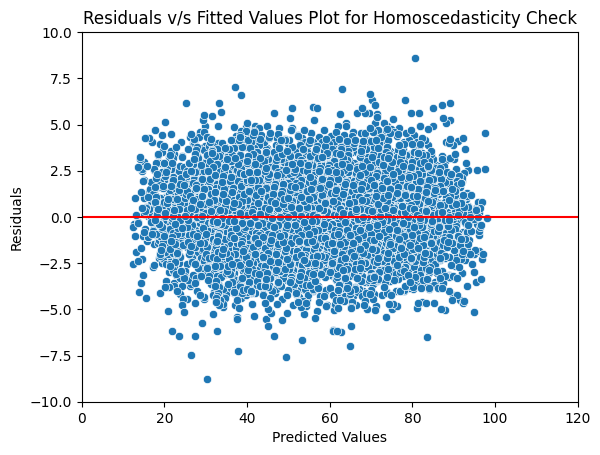

In [73]:
sns.scatterplot(x=y_pred_train, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,120)
sns.lineplot(x=[0,120],y=[0,0],color='red')
plt.title('Residuals v/s Fitted Values Plot for Homoscedasticity Check')

By plotting the error terms with predicted terms we can check that there isn't any pattern in the error terms. The assumption of Homoscedasticity can be confirmed using Goldfeld Quandt Test.
<br>The Goldfeld-Quandt test uses the following null and alternative hypothesis:
* **Null Hypothesis (Ho)**: Homoscedasticity is present
* **Alternative Hypothesis (H1)**: Homoscedasticity is not present

In [83]:
# Goldfeld Quandt Test for Homoscedasticity

from statsmodels.stats.diagnostic import het_goldfeldquandt

test_homo = het_goldfeldquandt(residuals,X_train)
print("F-statistics:",test_homo[0])
print("p_value:",test_homo[1])

F-statistics: 0.9953599575318915
p_value: 0.5543209001577459


As p_value > 0.05, therefore, we may accept the null hypothesis and conclude that the error terms are homoscedastic, that is, they all have same variance.

### 4. AUTOCORRELATION

When the residuals are autocorrelated, it means that the current value is dependent on the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
<br>There should not be autocorrelation in the data so the error terms should not form any pattern.

Text(0.5, 1.0, 'Residuals v/s Fitted Values Plot for Autocorrelation Check')

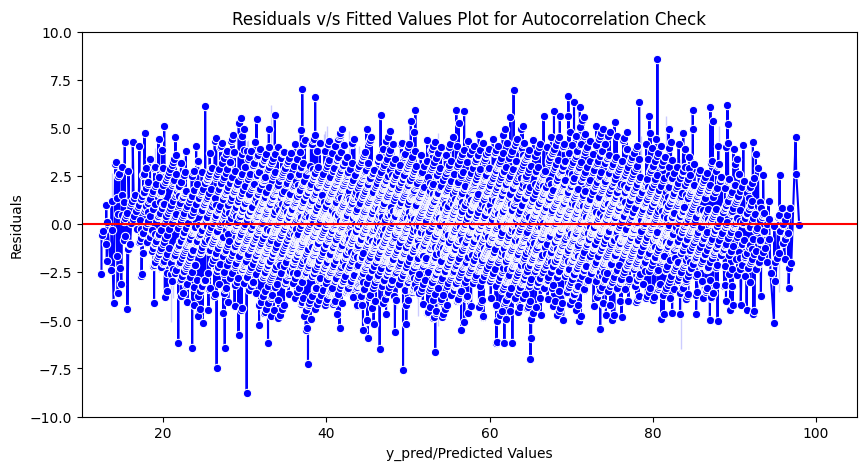

In [92]:
plt.figure(figsize=(10,5))
sns.lineplot(x=y_pred_train,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(10,105)
sns.lineplot(x=[0,120],y=[0,0],color='red')
plt.title('Residuals v/s Fitted Values Plot for Autocorrelation Check')

The Residuals (error term) does not exhibit any kind of pattern which indicates the absesnce of autocorrelation in error term. To further verify that we can look at the Autocorrelation (ACF) and Partial Autocorrelaton (PACF) plot for residuals, and also perform the Durbin-Watson test. 

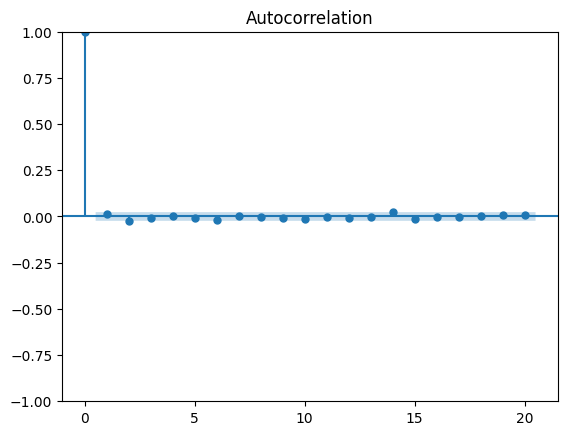

In [96]:
# Autocorrelation (ACF) Plot for Residuals

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals, lags=20)
plt.show()

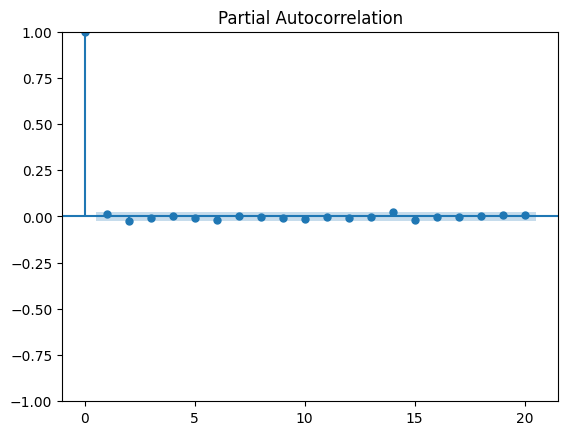

In [97]:
# Partial Autocorrelation (PACF) Plot for Residuals

plot_pacf(residuals, lags=20)
plt.show()

The ACF and PACF plot shows that the correlation cofficient at different lags are not statistically significant.

In [98]:
# Durbin-Watson test for Autocorrelation

from statsmodels.stats.stattools import durbin_watson

test_dw = durbin_watson(residuals)
print(test_dw)

1.96822698695573


The DW statistic is between 1.5 and 2.5 which confirms that there is no autocorrelation in the residuals.

### 5. Residuals are White Noise and Residuals ~ N(0,sigma^2) 

Text(0.5, 1.0, 'Distribution Curve of Residuals')

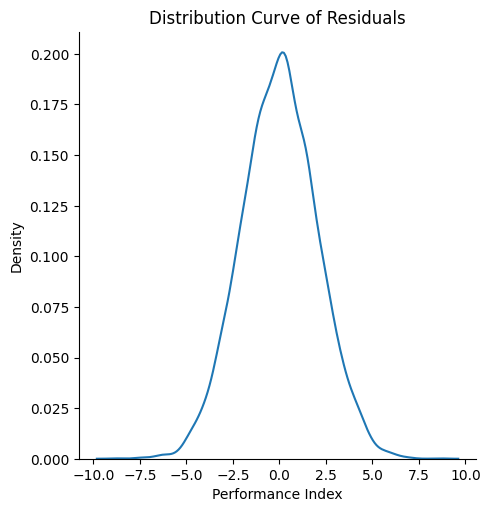

In [101]:
#Plotting the error terms

sns.displot(residuals,kind='kde')
plt.title('Distribution Curve of Residuals')

The distribution curve of error term is similar to that of Normal distribution and hence, we can conclude that error terms are actually white noise.